### Cortical surface ###

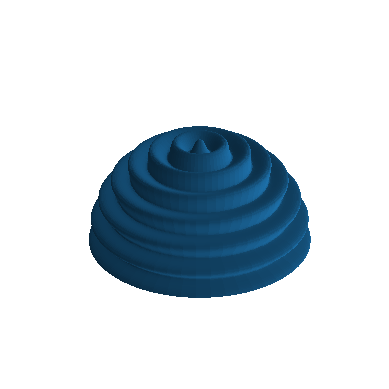

In [ ]:
import matplotlib.pyplot as plt
from configuration import Configuration
import numpy as np


config = Configuration("/home/emil/Uni/Masterthesis/local_subtraction_paper_code/multilayer_sphere_validation_study/configs.ini")
config.output_folder = "/home/emil/Uni/Masterthesis/inverse_code/inversion_methods/small_example"
config.input_folder = "/home/emil/Uni/Masterthesis/inverse_code/inversion_methods/small_example"

offset = 1
amplitude = 5
frequency = 28
center = config.sphere_center
radius = config.radii[-1]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

u = np.linspace(0, 2*np.pi, 100)
v = np.linspace(0, np.pi/2, 400)
U, V = np.meshgrid(u,v)
r = radius- (amplitude+offset) - 5/2 + amplitude * np.cos(frequency*V)
x = r*np.cos(U)*np.sin(V)
y = r*np.sin(U)*np.sin(V)
z = r*np.cos(V)
ax.plot_surface(x, y, z, rstride=2, cstride=2, edgecolor='none', linewidth=0, antialiased=False)

ax.set_aspect('equal')
plt.axis("off")

plt.savefig("/mnt/c/Users/emilb/sciebo/Uni/Masterarbeit/Figures/cortical_surface.png", transparent=True, dpi=1000)
plt.show()

### Lambda values ###

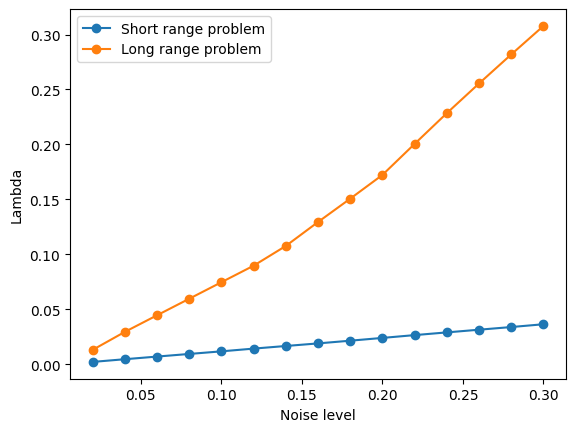

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt


with open("small_example/lambda_experiments/long_range_5000_1_nonneg.pkl", "rb") as file:
    lr5000, noise_levels = pickle.load(file)
    lr5000 = np.array(lr5000)
with open("small_example/lambda_experiments/short_range_5000_1_nonneg.pkl", "rb") as file:
    sr5000, noise_levels = pickle.load(file)
    sr5000 = np.array(sr5000)

plt.figure()
plt.plot(noise_levels, sr5000[:,-1], "o-")
plt.plot(noise_levels, lr5000, "o-")
plt.legend(["Short range problem", "Long range problem"])
plt.xlabel("Noise level")
plt.ylabel("Lambda")
plt.savefig("/mnt/c/Users/emilb/sciebo/Uni/Masterarbeit/Figures/lambdas_from_morozov.pdf", transparent=True)
plt.show()

### Long problem dipole strength ###

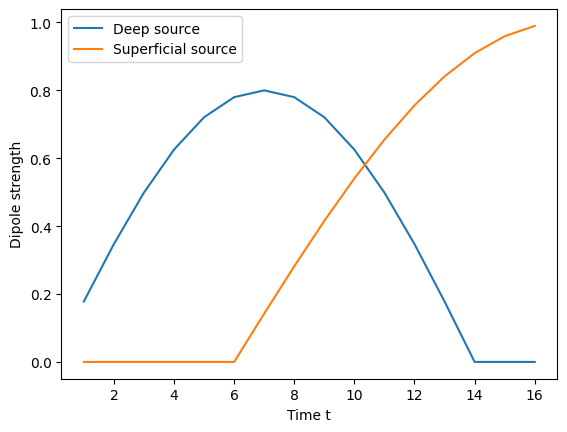

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from inverse_problem import InverseProblem
import pickle

with open("small_example/long_range_problem.pkl", "rb") as file:
    inverse_problem = pickle.load(file)

plt.figure()
plt.plot(range(1,17), inverse_problem.active_dipoles[0,:])
plt.plot(range(1,17), inverse_problem.active_dipoles[1,:])
plt.legend(["Deep source", "Superficial source"])
plt.xlabel("Time t")
plt.ylabel("Dipole strength")
plt.savefig("/mnt/c/Users/emilb/sciebo/Uni/Masterarbeit/Figures/long_connection_dipole_strength.pdf", transparent=True)
plt.show()

### Short problem dipole strength ###

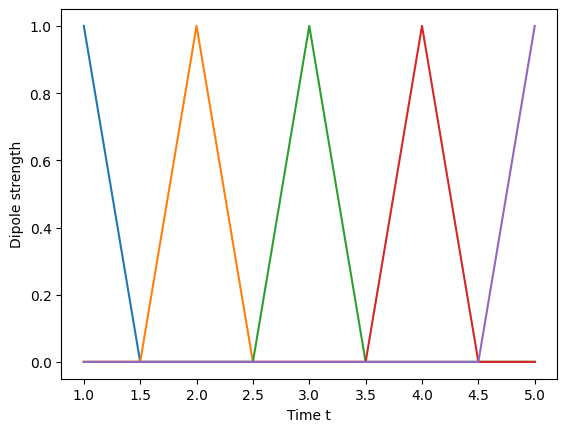

In [6]:
import matplotlib.pyplot as plt
import numpy as np

t = [1,1.5,2,2.5,3,3.5,4,4.5,5]
plt.figure
for i in range(5):
    signal = np.zeros(len(t))
    signal[i*2] = 1
    plt.plot(t, signal)

plt.xlabel("Time t")
plt.ylabel("Dipole strength")
plt.savefig("/mnt/c/Users/emilb/sciebo/Uni/Masterarbeit/Figures/short_connection_dipole_strength.pdf", transparent=True)
plt.show()

### ADMM ###

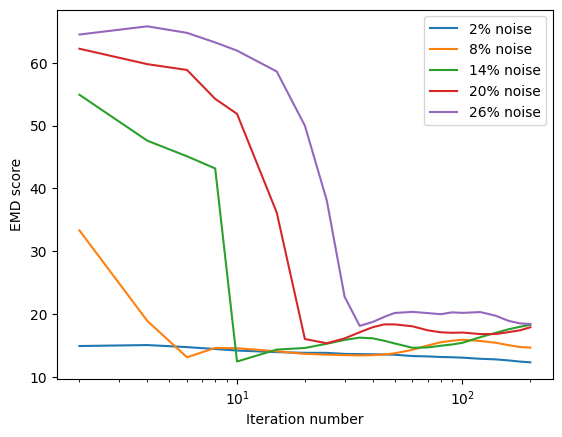

In [5]:
with open(f"small_example/lambda_experiments/admm_short_range_5000_1_g50.pkl", "rb") as file:
    admm_solutions, admm_scores, primal_residuals, dual_residuals, relative_errors, iteration_numbers, noise_level_subset = pickle.load(file)
    admm_solutions = np.array(admm_solutions)
    admm_scores = np.array(admm_scores)
    primal_residuals = np.array(primal_residuals)
    dual_residuals = np.array(dual_residuals)
    relative_errors = np.array(relative_errors)
with open("small_example/lambda_experiments/short_range_5000_1_nonneg.pkl", "rb") as file:
    _, noise_levels = pickle.load(file)

iteration_cutoff = 23
for i in range(len(noise_level_subset)):
    plt.semilogx(iteration_numbers[:iteration_cutoff], admm_scores[:iteration_cutoff,i], label=f"{noise_levels[noise_level_subset[i]]*100:.0f}% noise")
plt.legend()
plt.xlabel("Iteration number")
plt.ylabel("EMD score")
plt.savefig("/mnt/c/Users/emilb/sciebo/Uni/Masterarbeit/Figures/admm_emd_short.pdf", transparent=True)
plt.show()

In [ ]:
with open(f"small_example/lambda_experiments/admm_short_range_5000_1_g50.pkl", "rb") as file:
    admm_solutions, admm_scores, primal_residuals, dual_residuals, relative_errors, iteration_numbers, noise_level_subset = pickle.load(file)
    admm_solutions = np.array(admm_solutions)
    admm_scores = np.array(admm_scores)
    primal_residuals = np.array(primal_residuals)
    dual_residuals = np.array(dual_residuals)
    relative_errors = np.array(relative_errors)
with open("small_example/lambda_experiments/short_range_5000_1_nonneg.pkl", "rb") as file:
    _, noise_levels = pickle.load(file)

iteration_cutoff = 23
for i in range(len(noise_level_subset)):
    plt.semilogx(iteration_numbers[:iteration_cutoff], admm_scores[:iteration_cutoff,i], label=f"{noise_levels[noise_level_subset[i]]*100:.0f}% noise")
plt.legend()
plt.xlabel("Iteration number")
plt.ylabel("EMD score")
plt.savefig("/mnt/c/Users/emilb/sciebo/Uni/Masterarbeit/Figures/admm_emd_short.pdf", transparent=True)
plt.show()

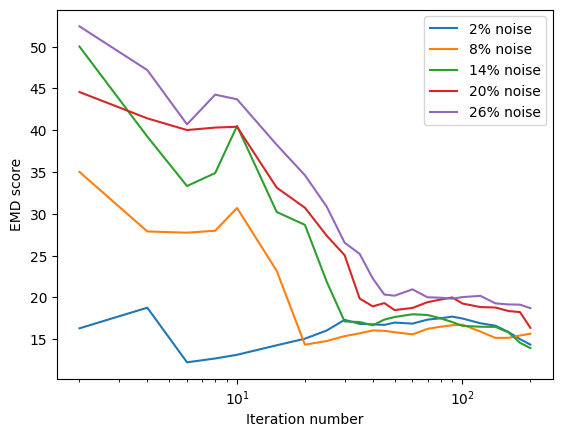

In [4]:
with open(f"small_example/lambda_experiments/admm_long_range_5000_1_g50.pkl", "rb") as file:
    admm_solutions, admm_scores, primal_residuals, dual_residuals, relative_errors, iteration_numbers, noise_level_subset = pickle.load(file)
    admm_solutions = np.array(admm_solutions)
    admm_scores = np.array(admm_scores)
    primal_residuals = np.array(primal_residuals)
    dual_residuals = np.array(dual_residuals)
    relative_errors = np.array(relative_errors)
with open("small_example/lambda_experiments/short_range_5000_1_nonneg.pkl", "rb") as file:
    _, noise_levels = pickle.load(file)

iteration_cutoff = 23
for i in range(len(noise_level_subset)):
    plt.semilogx(iteration_numbers[:iteration_cutoff], admm_scores[:iteration_cutoff,i], label=f"{noise_levels[noise_level_subset[i]]*100:.0f}% noise")
plt.legend()
plt.xlabel("Iteration number")
plt.ylabel("EMD score")
plt.savefig("/mnt/c/Users/emilb/sciebo/Uni/Masterarbeit/Figures/admm_emd_long.pdf", transparent=True)
plt.show()